# #Quarentenadados Alura + Data Hackers

Um pequeno curso de Ciência de Dados para quem está começando. 
É a #QuarentenaDados, gratuita, com inscrições até domingo! Com apoio da Alura Cursos Online, 
Caelum e DataHackers. Indique para seus colegas! https://lnkd.in/dEcZ328


Desafios dia 01

In [2]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

a = [1,2]]
adf = pd.DataFrame(a)
adf

,0,1
0,um,dois
1,1,2


In [3]:
#Lendo arquivos csv necessários
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [4]:
#Traduzindo o nome das colunas
filmes.columns = ['filmeId','titulo','generos']
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [5]:
#Calculando a média das avaliações de cada filme
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [6]:
#Criando um novo DataFrame com os filmes e as notas médias
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [7]:
# Apenas verifiquei na coluna nota os valores null e somei cada um com o sum().
filmes_com_media['nota'].isnull().sum()

18

In [8]:
#Criei uma lista que recebia o título do filme onde o valor da avaliação era nulo.
lista_null = filmes_com_media['titulo'].loc[filmes_com_media['nota'].isnull()]
lista_null

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

# Desafio 2 do Guilherme Silveira
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [9]:
#Criei uma coluna 'nota_media' que recebeu os dados da coluna 'nota', depois removi a coluna duplicada.
filmes_com_media['nota_media'] = filmes_com_media['nota']
filmes_com_media.drop('nota', axis=1, inplace = True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3 do Guilherme Silveira
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [10]:
#Calculando a quantidade de avaliações por filme
avaliacoes_por_filme = avaliacoes.groupby(by='filmeId')['nota'].count()
avaliacoes_por_filme

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [11]:
#Criando um novo DataFrame com os filmes com o numero de avaliacoes de cada filme
filmes_com_media_avaliacoes = filmes_com_media.join(avaliacoes_por_filme,on="filmeId")
filmes_com_media_avaliacoes.columns = ["filmeId", "titulo", "generos", "nota_media", "avaliacoes"]
filmes_com_media_avaliacoes.head()

,filmeId,titulo,generos,nota_media,avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4 do Thiago Gonçalves
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [12]:
#Arredondo todas os valores da coluna nota_media para no máximo duas casas decimais
filmes_com_media_avaliacoes['nota_media'] = filmes_com_media_avaliacoes['nota_media'].round(2)
filmes_com_media_avaliacoes.head()

,filmeId,titulo,generos,nota_media,avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


# Desafio 5 do Allan Spadini
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [13]:
generos = filmes_com_media_avaliacoes['generos'].str.get_dummies('|')
generos_list = generos.columns
generos_list

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

# Desafio 6 da Thais André
Contar o número de aparições de cada genero.

In [14]:
generos.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

# Desafio 7 do Guilherme Silveira
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

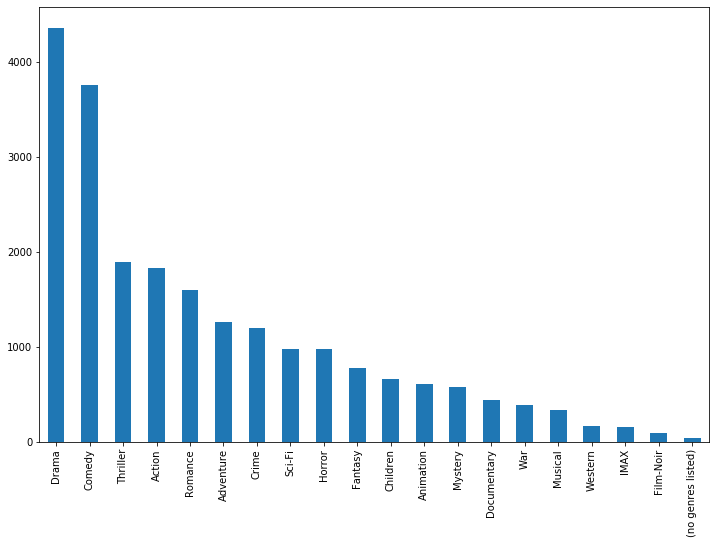

In [15]:
generos.sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

In [16]:
filmes_com_media_avaliacoes.to_csv('datasets/data_filmes_processado')